In [2]:
import matplotlib
from matplotlib.colors import to_hex
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.mixture import BayesianGaussianMixture
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from pylab import *
from matplotlib import rc
import matplotlib.ticker as ticker
import seaborn as sn
import folium

from Wind.Util import find_exp, count_exp, sel_result, sel_upper_lower

cpal = plt.get_cmap('Reds')

coords = np.load('../Data/coords.npy')

%matplotlib notebook

In [3]:
def query_results(query):
    count_exp(query)
    res = find_exp(query)
    sites, coord = sel_result(res,col)
    valsum = np.sum(coord,axis=1)   
    return sites, coord, valsum

In [4]:
col=1

sitesr, coordr = sel_upper_lower('eastwest9597', 'seq2seq',col)

print(len(sitesr))
valsumr = np.sum(coordr,axis=1)


200


# Parameter Tunning EastWest with RNN S2S Dropout

In [8]:
sites1, coord1, valsum1 = query_results({'status':'done', "arch.mode": "seq2seq", "experiment":"EWRNNS2S", "arch.drop":0.1, "arch.nlayersE":1, "data.lag":18,
                                         "arch.neurons":96, "arch.neuronsD":64, "arch.activation":"relu", "training.batch":1000})
sites2, coord2, valsum2 = query_results({'status':'done', "arch.mode": "seq2seq", "experiment":"EWRNNS2S", "arch.drop":0.0, "arch.nlayersE":1, "data.lag":18,
                                         "arch.neurons":96, "arch.neuronsD":64, "arch.activation":"relu", "training.batch":1000})
sites3, coord3, valsum3 = query_results({'status':'done', "arch.mode": "seq2seq", "experiment":"EWRNNS2S", "arch.drop":0.2, "arch.nlayersE":1, "data.lag":18,
                                         "arch.neurons":96, "arch.neuronsD":64, "arch.activation":"relu", "training.batch":1000})
sites4, coord4, valsum4 = query_results({'status':'done', "arch.mode": "seq2seq", "experiment":"EWRNNS2S", "arch.drop":0.4, "arch.nlayersE":1, "data.lag":18,
                                         "arch.neurons":96, "arch.neuronsD":64, "arch.activation":"relu", "training.batch":1000})
sitesr2, coordr2, valsumr2 = query_results({'status':'done', "arch.mode": "seq2seq", "experiment":"EWRNNS2S", "arch.drop":0.3, "arch.nlayersE":1, "data.lag":18,
                                         "arch.neurons":96, "arch.neuronsD":64, "arch.activation":"relu", "training.batch":1000})

200
200
200
200
200


<IPython.core.display.Javascript object>


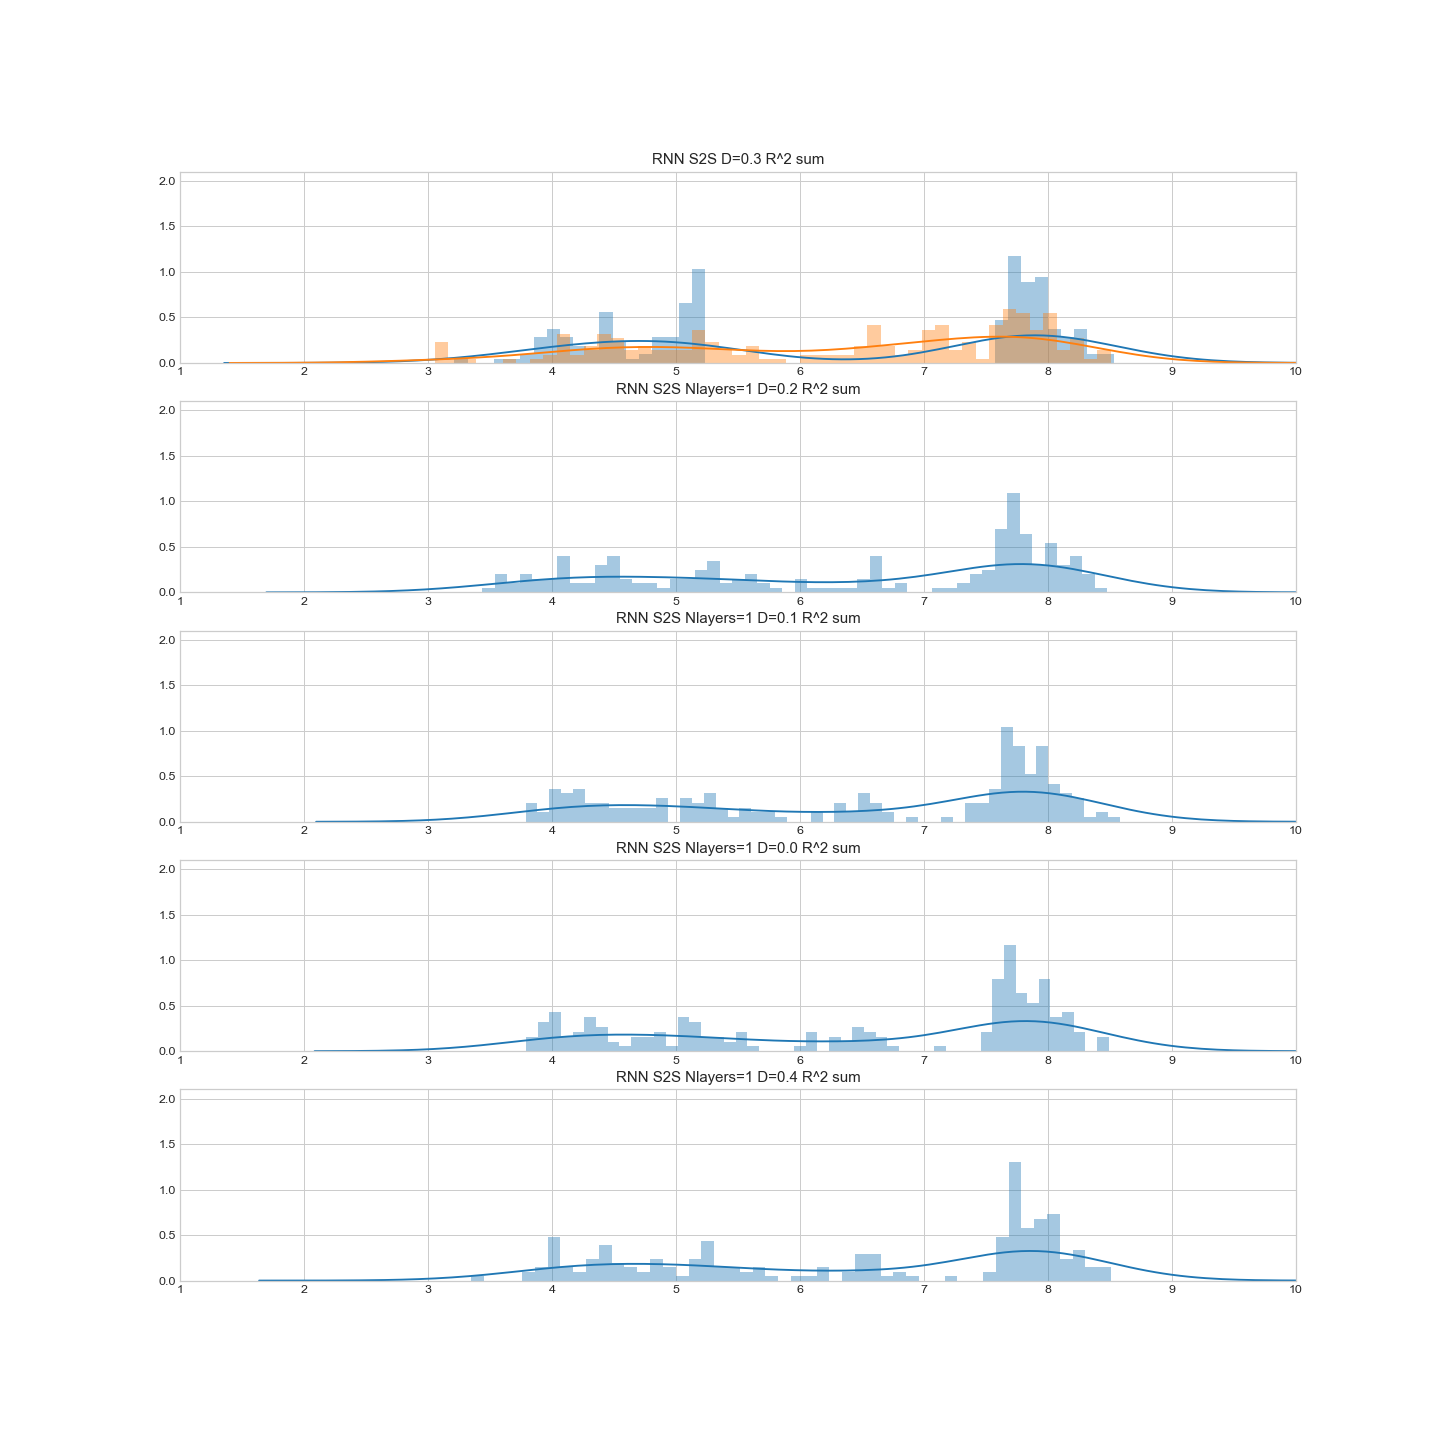

/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [249]:
sn.set_style("whitegrid")
fig = plt.figure(figsize=(16, 16), dpi=100)
axes = fig.add_subplot(5, 1, 1)
axes.set_title('RNN S2S D=0.3 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsumr, bins=50);
sn.distplot(valsumr2, bins=50);
axes = fig.add_subplot(5, 1, 2)
axes.set_title('RNN S2S Nlayers=1 D=0.2 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsum3, bins=50);
axes = fig.add_subplot(5, 1, 3)
axes.set_title('RNN S2S Nlayers=1 D=0.1 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsum1, bins=50);
axes = fig.add_subplot(5, 1, 4)
axes.set_title('RNN S2S Nlayers=1 D=0.0 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsum2, bins=50);
axes = fig.add_subplot(5, 1, 5)
axes.set_title('RNN S2S Nlayers=1 D=0.4 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsum4, bins=50);

# Parameter Tunning EastWest with RNN S2S Nlayers encoder

In [250]:
sites1, coord1, valsum1 = query_results({'status':'done', "arch.mode": "seq2seq", "experiment":"EWRNNS2S", "arch.drop":0.3, "arch.nlayersE":2, "data.lag":18,
                                         "arch.neurons":96, "arch.neuronsD":64, "arch.activation":"relu", "training.batch":1000})
sites2, coord2, valsum2 = query_results({'status':'done', "arch.mode": "seq2seq", "experiment":"EWRNNS2S", "arch.drop":0.3, "arch.nlayersE":3, "data.lag":18,
                                         "arch.neurons":96, "arch.neuronsD":64, "arch.activation":"relu", "training.batch":1000})


200
200


<IPython.core.display.Javascript object>


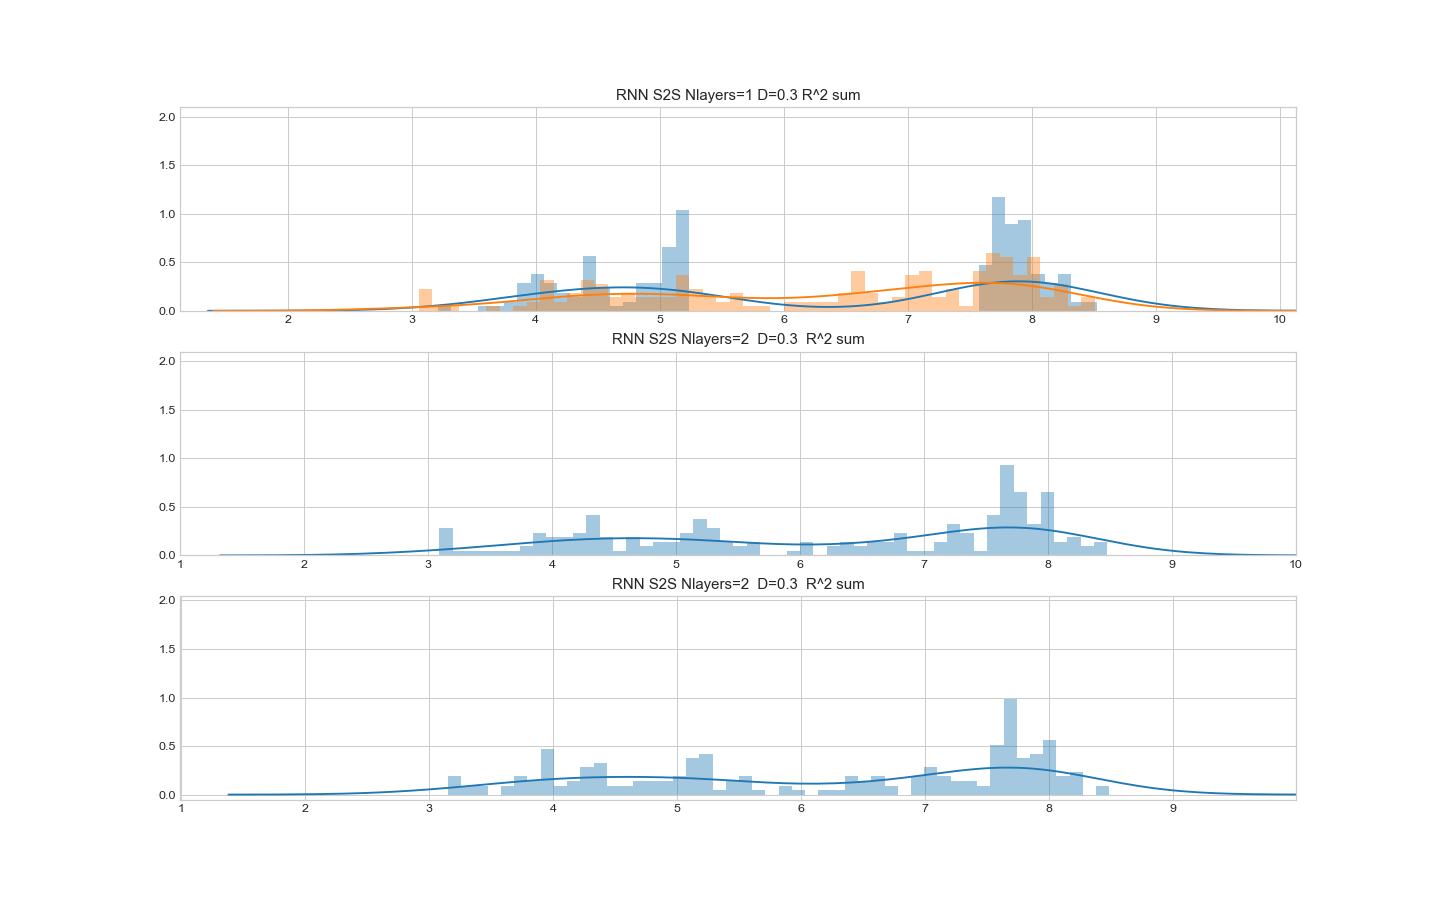

/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [251]:
sn.set_style("whitegrid")
fig = plt.figure(figsize=(16, 10), dpi=100)
axes = fig.add_subplot(3, 1, 1)
axes.set_title('RNN S2S Nlayers=1 D=0.3 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsumr, bins=50);
sn.distplot(valsumr2, bins=50);
axes = fig.add_subplot(3, 1, 2)
axes.set_title('RNN S2S Nlayers=2  D=0.3  R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsum1, bins=50);
axes = fig.add_subplot(3, 1, 3)
axes.set_title('RNN S2S Nlayers=2  D=0.3  R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsum2, bins=50);

# Parameter Tunning EastWest with RNN S2S Lag

In [252]:
sites1, coord1, valsum1 = query_results({'status':'done', "arch.mode": "seq2seq", "experiment":"EWRNNS2S", "arch.drop":0.3, "arch.nlayersE":1, "data.lag":12,
                                         "arch.neurons":96, "arch.neuronsD":64, "arch.activation":"relu", "training.batch":1000})
sites2, coord2, valsum2 = query_results({'status':'done', "arch.mode": "seq2seq", "experiment":"EWRNNS2S", "arch.drop":0.3, "arch.nlayersE":1, "data.lag":24,
                                         "arch.neurons":96, "arch.neuronsD":64, "arch.activation":"relu", "training.batch":1000})


200
200


<IPython.core.display.Javascript object>


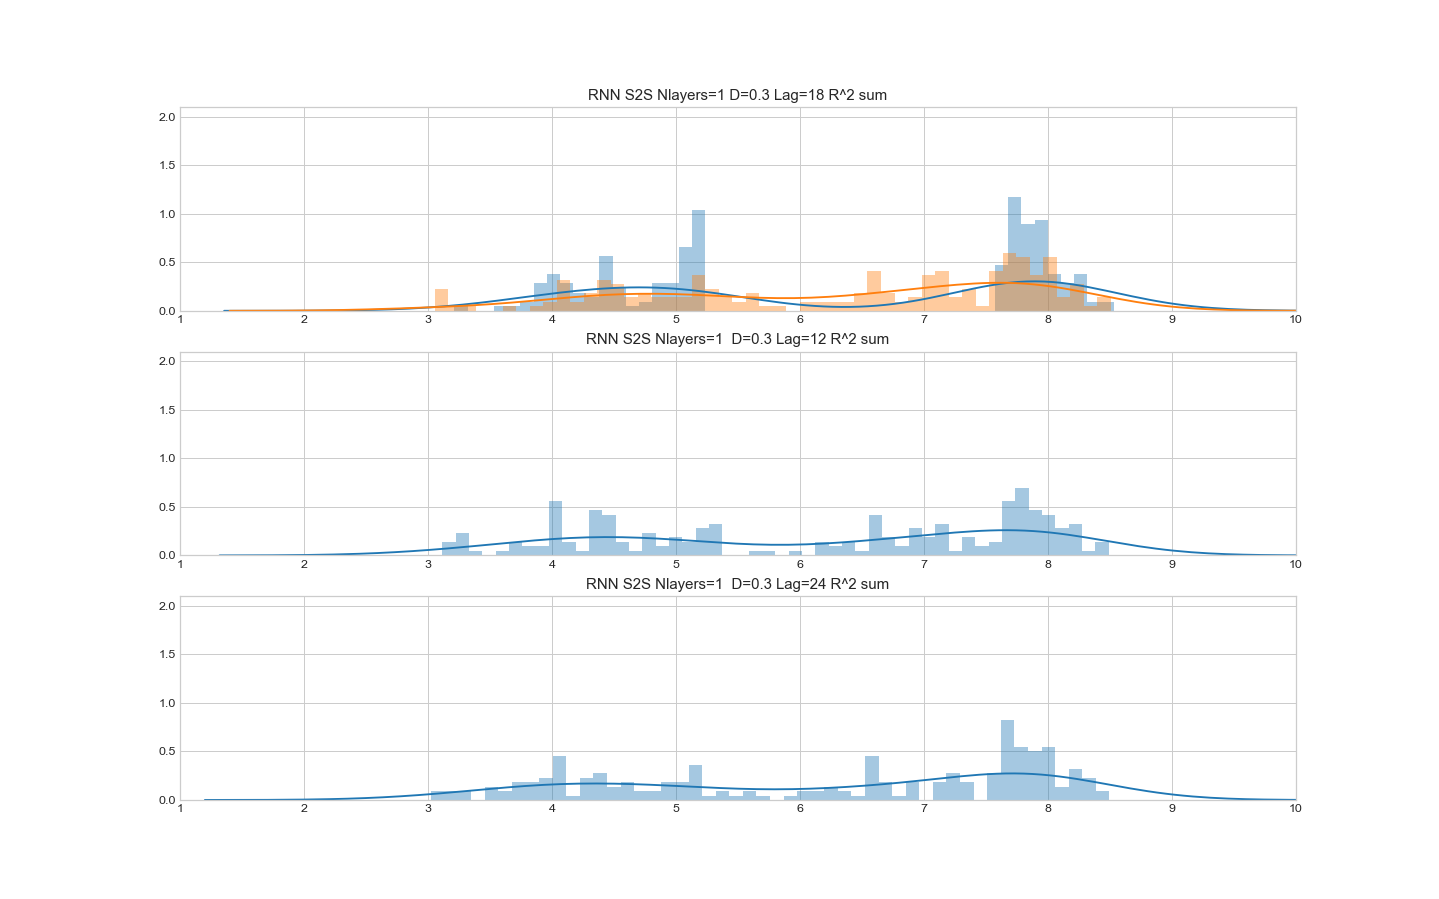

/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [253]:
sn.set_style("whitegrid")
fig = plt.figure(figsize=(16, 10), dpi=100)
axes = fig.add_subplot(3, 1, 1)
axes.set_title('RNN S2S Nlayers=1 D=0.3 Lag=18 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsumr, bins=50);
sn.distplot(valsumr2, bins=50);
axes = fig.add_subplot(3, 1, 2)
axes.set_title('RNN S2S Nlayers=1  D=0.3 Lag=12 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsum1, bins=50);
axes = fig.add_subplot(3, 1, 3)
axes.set_title('RNN S2S Nlayers=1  D=0.3 Lag=24 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsum2, bins=50);

# Parameter Tunning EastWest with RNN S2S Neurons

In [254]:
sites1, coord1, valsum1 = query_results({'status':'done', "arch.mode": "seq2seq", "experiment":"EWRNNS2S", "arch.drop":0.3, "arch.nlayersE":1, "data.lag":18,
                                         "arch.neurons":64, "arch.neuronsD":64, "arch.activation":"relu", "training.batch":1000})
sites2, coord2, valsum2 = query_results({'status':'done', "arch.mode": "seq2seq", "experiment":"EWRNNS2S", "arch.drop":0.3, "arch.nlayersE":1, "data.lag":18,
                                         "arch.neurons":128, "arch.neuronsD":64, "arch.activation":"relu", "training.batch":1000})
sites3, coord3, valsum3 = query_results({'status':'done', "arch.mode": "seq2seq", "experiment":"EWRNNS2S", "arch.drop":0.3, "arch.nlayersE":1, "data.lag":18,
                                         "arch.neurons":96, "arch.neuronsD":32, "arch.activation":"relu", "training.batch":1000})
sites4, coord4, valsum4 = query_results({'status':'done', "arch.mode": "seq2seq", "experiment":"EWRNNS2S", "arch.drop":0.3, "arch.nlayersE":1, "data.lag":18,
                                         "arch.neurons":96, "arch.neuronsD":96, "arch.activation":"relu", "training.batch":1000})

200
200
200
200


<IPython.core.display.Javascript object>


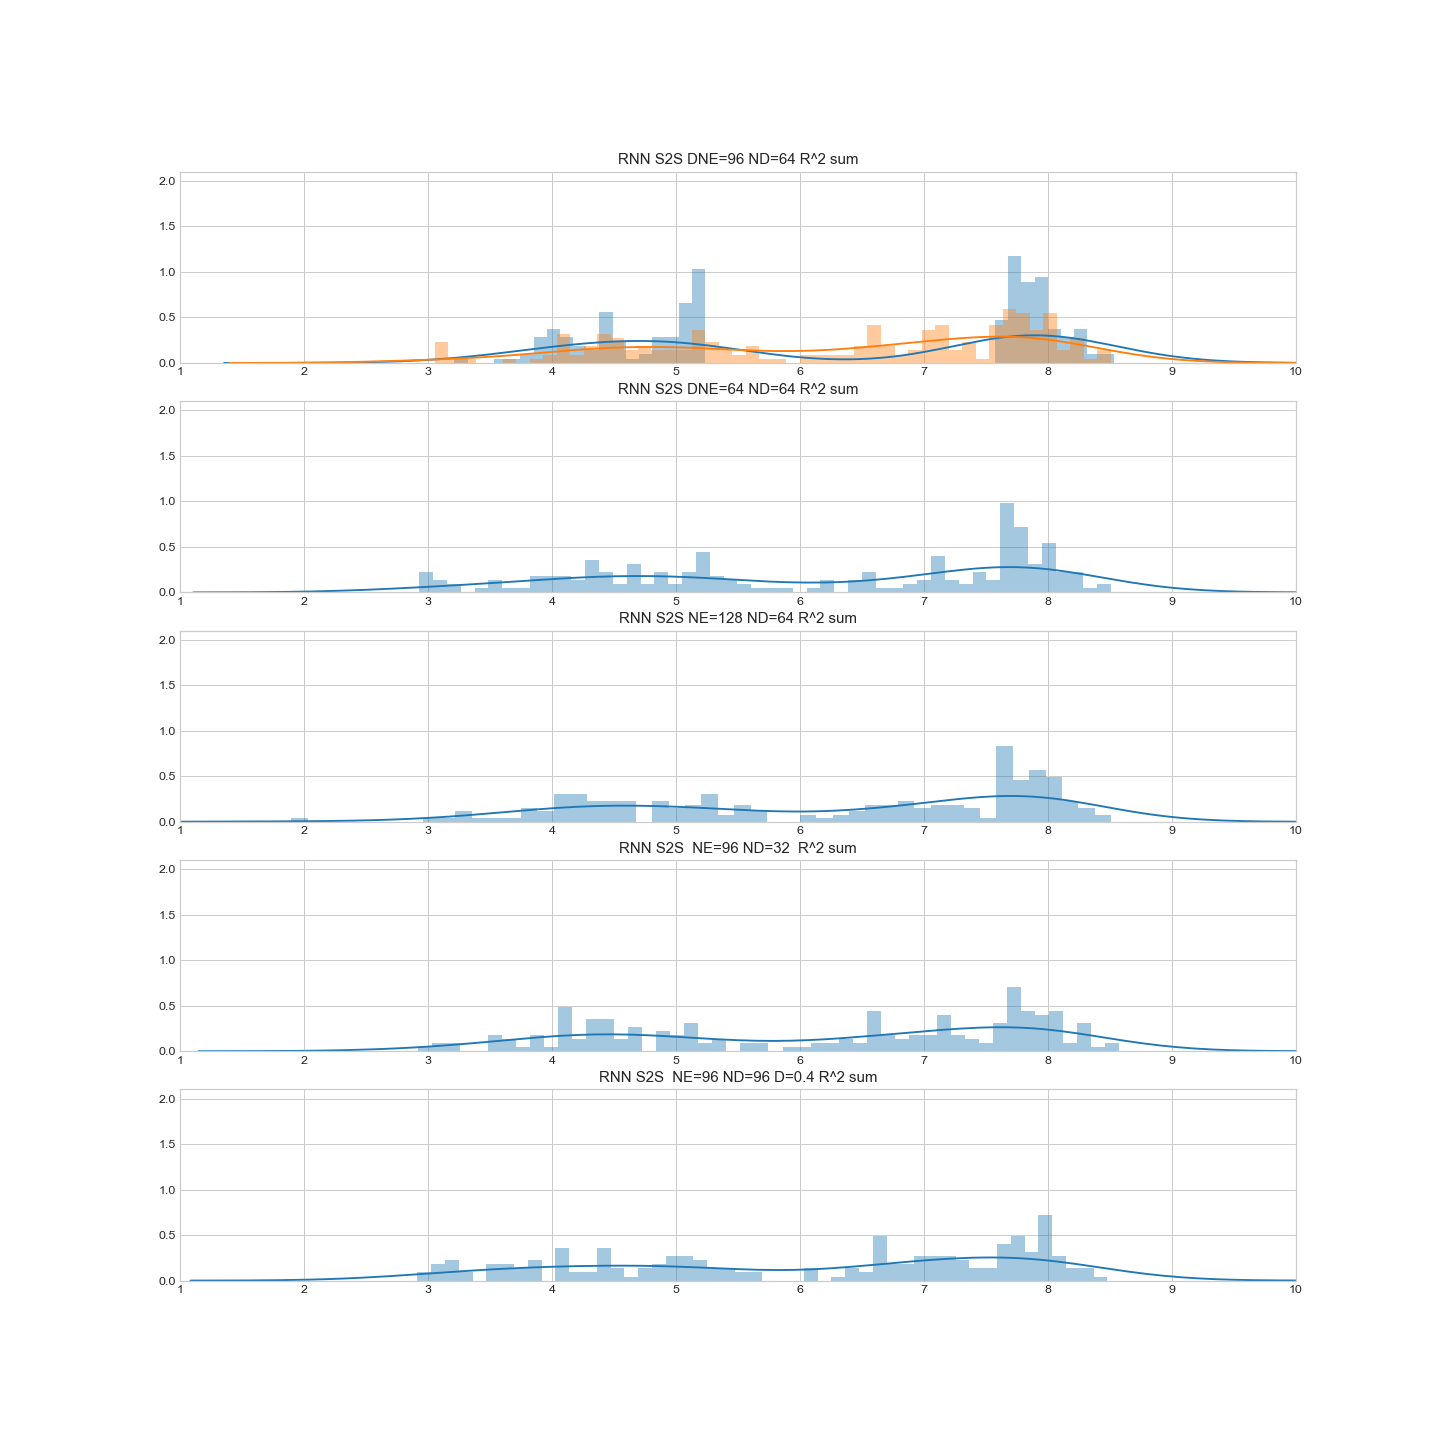

/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [255]:
sn.set_style("whitegrid")
fig = plt.figure(figsize=(16, 16), dpi=100)
axes = fig.add_subplot(5, 1, 1)
axes.set_title('RNN S2S DNE=96 ND=64 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsumr, bins=50);
sn.distplot(valsumr2, bins=50);
axes = fig.add_subplot(5, 1, 2)
axes.set_title('RNN S2S DNE=64 ND=64 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsum3, bins=50);
axes = fig.add_subplot(5, 1, 3)
axes.set_title('RNN S2S NE=128 ND=64 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsum1, bins=50);
axes = fig.add_subplot(5, 1, 4)
axes.set_title('RNN S2S  NE=96 ND=32  R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsum2, bins=50);
axes = fig.add_subplot(5, 1, 5)
axes.set_title('RNN S2S  NE=96 ND=96 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsum4, bins=50);

# Parameter Tunning EastWest with RNN S2S Activation

In [262]:
sites1, coord1, valsum1 = query_results({'status':'done', "arch.mode": "seq2seq", "experiment":"EWRNNS2S", "arch.drop":0.3, "arch.nlayersE":1, "data.lag":18,
                                         "arch.neurons":96, "arch.neuronsD":64, "arch.activation":"tanh", "training.batch":1000})


200


<IPython.core.display.Javascript object>


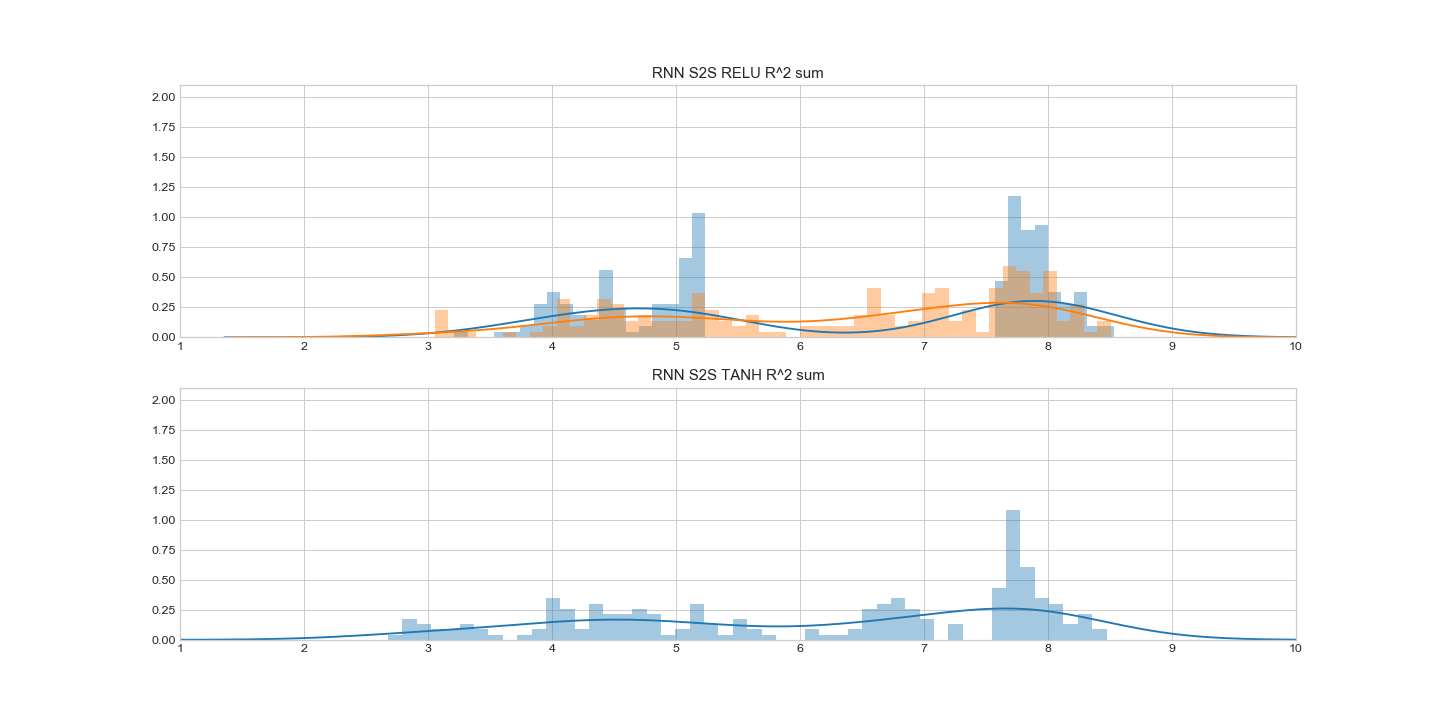

/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [263]:
sn.set_style("whitegrid")
fig = plt.figure(figsize=(16, 8), dpi=100)
axes = fig.add_subplot(2, 1, 1)
axes.set_title('RNN S2S RELU R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsumr, bins=50);
sn.distplot(valsumr2, bins=50);
axes = fig.add_subplot(2, 1, 2)
axes.set_title('RNN S2S TANH R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsum1, bins=50);

# Parameter Tunning EastWest with RNN S2S Batch size

In [317]:
sites1, coord1, valsum1 = query_results({'status':'done', "arch.mode": "seq2seq", "experiment":"EWRNNS2S", "arch.drop":0.3, "arch.nlayersE":1, "data.lag":18,
                                         "arch.neurons":96, "arch.neuronsD":64, "arch.activation":"relu", "training.batch":100})
sites2, coord2, valsum2 = query_results({'status':'done', "arch.mode": "seq2seq", "experiment":"EWRNNS2S", "arch.drop":0.1, "arch.nlayersE":1, "data.lag":18,
                                         "arch.neurons":96, "arch.neuronsD":64, "arch.activation":"relu", "training.batch":100})
sites3, coord3, valsum3 = query_results({'status':'done', "arch.mode": "seq2seq", "experiment":"EWRNNS2S", "arch.drop":0.3, "arch.nlayersE":1, "data.lag":18,
                                         "arch.neurons":96, "arch.neuronsD":64, "arch.activation":"relu", "training.batch":500})
sites4, coord4, valsum4 = query_results({'status':'done', "arch.mode": "seq2seq", "experiment":"EWRNNS2S", "arch.drop":0.3, "arch.nlayersE":1, "data.lag":18,
                                         "arch.neurons":96, "arch.neuronsD":64, "arch.activation":"relu", "training.batch":2000})
sites5, coord5, valsum5 = query_results({'status':'done', "arch.mode": "seq2seq", "experiment":"EWRNNS2S", "arch.drop":0.3, "arch.nlayersE":1, "data.lag":18,
                                         "arch.neurons":96, "arch.neuronsD":64, "arch.activation":"relu", "training.batch":5000})


200
200
200
200
200


<IPython.core.display.Javascript object>


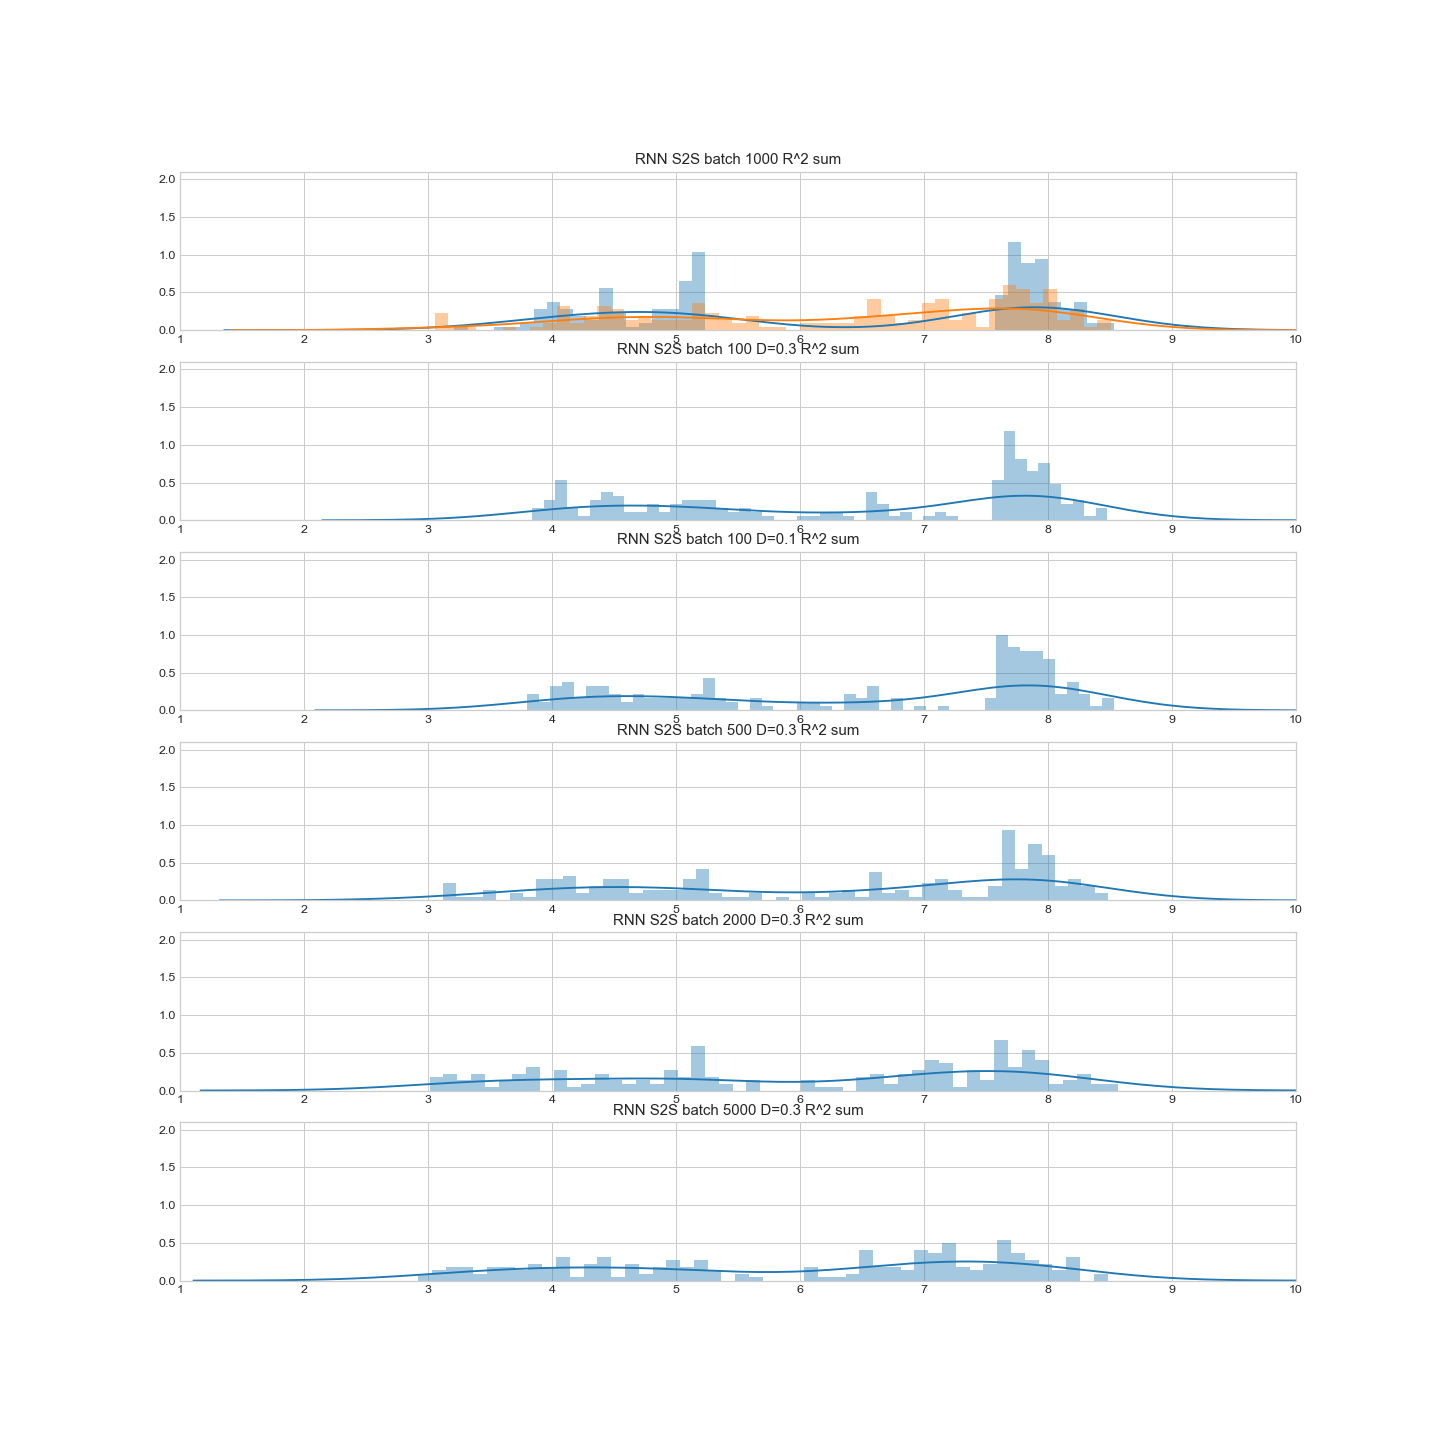

/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [319]:
sn.set_style("whitegrid")
fig = plt.figure(figsize=(16, 16), dpi=100)
axes = fig.add_subplot(6, 1, 1)
axes.set_title('RNN S2S batch 1000 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsumr, bins=50);
sn.distplot(valsumr2, bins=50);
axes = fig.add_subplot(6, 1, 2)
axes.set_title('RNN S2S batch 100 D=0.3 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsum1, bins=50);
axes = fig.add_subplot(6, 1, 3)
axes.set_title('RNN S2S batch 100 D=0.1 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsum2, bins=50);
axes = fig.add_subplot(6, 1, 4)
axes.set_title('RNN S2S batch 500 D=0.3 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsum3, bins=50);
axes = fig.add_subplot(6, 1, 5)
axes.set_title('RNN S2S batch 2000 D=0.3 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsum4, bins=50);
axes = fig.add_subplot(6, 1, 6)
axes.set_title('RNN S2S batch 5000 D=0.3 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsum5, bins=50);

# Parameter Tunning EastWest with RNN S2S Decoder size

In [7]:
sites1, coord1, valsum1 = query_results({'status':'done', "arch.mode": "seq2seq", "experiment":"EWRNNS2S", "arch.drop":0.3, "arch.nlayersE":1, "data.lag":18,
                                         "arch.neurons":64, "arch.neuronsD":256, "arch.activation":"relu", "training.batch":1000})
sites2, coord2, valsum2 = query_results({'status':'done', "arch.mode": "seq2seq", "experiment":"EWRNNS2S", "arch.drop":0.3, "arch.nlayersE":1, "data.lag":18,
                                         "arch.neurons":64, "arch.neuronsD":512, "arch.activation":"relu", "training.batch":1000})


200
200


/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


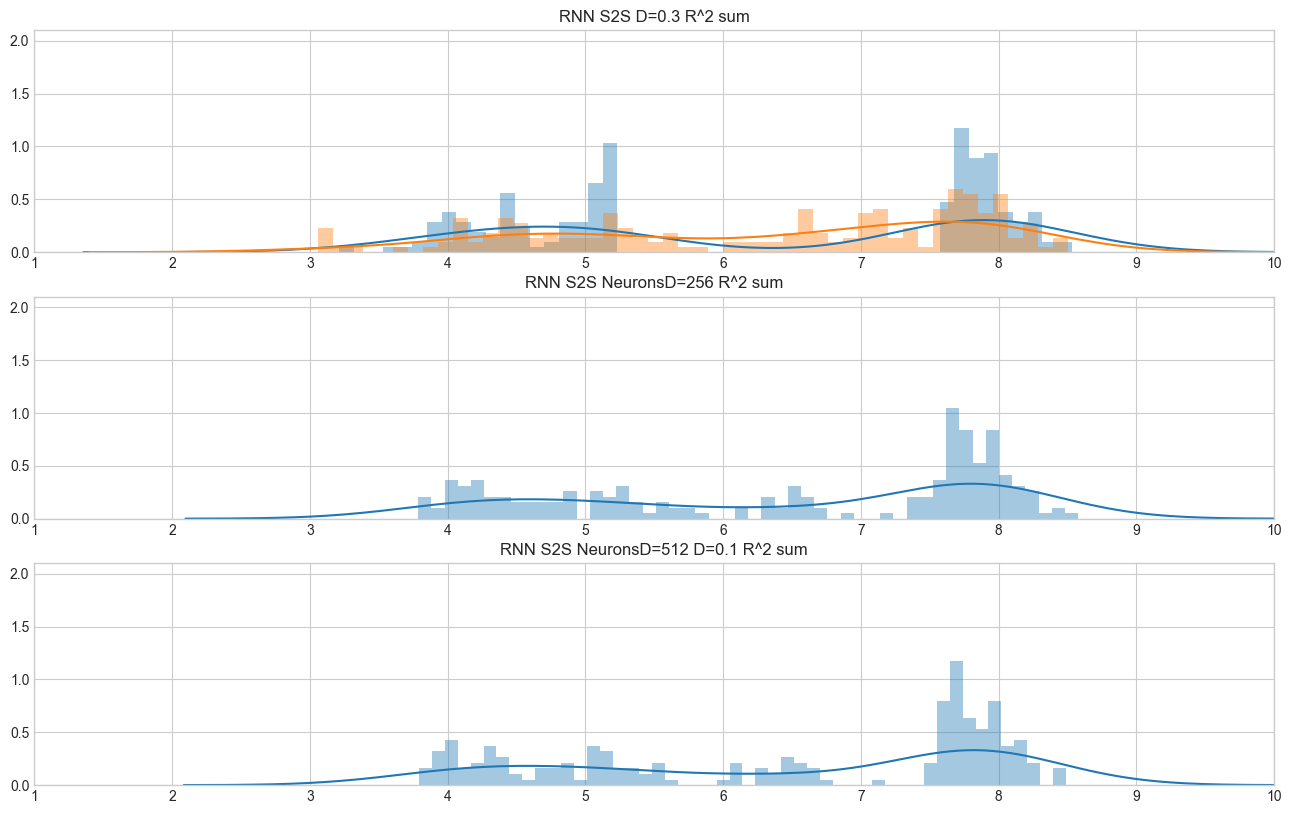

In [11]:
sn.set_style("whitegrid")
fig = plt.figure(figsize=(16, 10), dpi=100)
axes = fig.add_subplot(3, 1, 1)
axes.set_title('RNN S2S D=0.3 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsumr, bins=50);
sn.distplot(valsumr2, bins=50);
axes = fig.add_subplot(3, 1, 2)
axes.set_title('RNN S2S NeuronsD=256 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsum1, bins=50);
axes = fig.add_subplot(3, 1, 3)
axes.set_title('RNN S2S NeuronsD=512 D=0.1 R^2 sum')
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 10)
plt.ylim(0, 2.1)
sn.distplot(valsum2, bins=50);
